# **Predictive Analytics Project**: Prediksi Risiko Serangan Jantung

## **Instalasi dan Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import joblib

## **Memuat Dataset**

In [ ]:
# Load dataset
df = pd.read_csv("dataset.csv")

## **Eksplorasi Awal Dataset & Data Understanding**

### **Eksplorasi Awal Dataset**

In [ ]:
# Lihat 5 baris pertama
print("Preview dataset: ")
display(df.head())

Preview dataset: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Info tipe data & null check
print("\nInformasi kolom:")
df.info()


Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Cek missing values
print("\nMissing values tiap kolom:")
print(df.isnull().sum())


Missing values tiap kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
display(df.describe())


Statistik deskriptif:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Data Understanding**

Dataset ini berisi 1025 data pasien dengan berbagai fitur medis yang berkaitan dengan risiko penyakit jantung. Tujuan dari proyek ini adalah memprediksi apakah seseorang berisiko terkena penyakit jantung (1) atau tidak (0), yang ditunjukkan oleh kolom `target`.

### Penjelasan fitur:
- **age**: usia pasien
- **sex**: jenis kelamin (1 = pria, 0 = wanita)
- **cp**: tipe nyeri dada (0–3)
- **trestbps**: tekanan darah saat istirahat (mm Hg)
- **chol**: kadar kolesterol dalam darah (mg/dl)
- **fbs**: gula darah > 120 mg/dl (1 = ya, 0 = tidak)
- **restecg**: hasil EKG saat istirahat (0–2)
- **thalach**: detak jantung maksimal yang dicapai
- **exang**: angina akibat olahraga (1 = ya, 0 = tidak)
- **oldpeak**: depresi ST akibat olahraga
- **slope**: kemiringan segmen ST (0–2)
- **ca**: jumlah pembuluh darah utama (0–3)
- **thal**: nilai thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)
- **target**: 1 = berisiko jantung, 0 = tidak

Dataset ini tidak mengandung missing value, sehingga bisa langsung dilanjutkan ke tahap berikutnya.


## **Exploratory Data Analysis (EDA)**

In [ ]:
# Set style
sns.set(style="whitegrid")

Distribusi Target

<ipython-input-10-8bcabfddecc2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


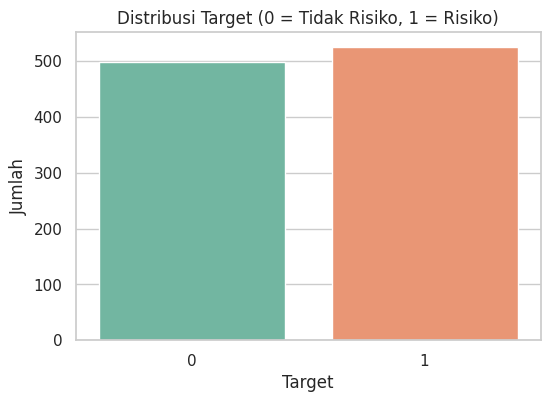

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Distribusi Target (0 = Tidak Risiko, 1 = Risiko)")
plt.xlabel("Target")
plt.ylabel("Jumlah")
plt.show()

Distribusi Usia

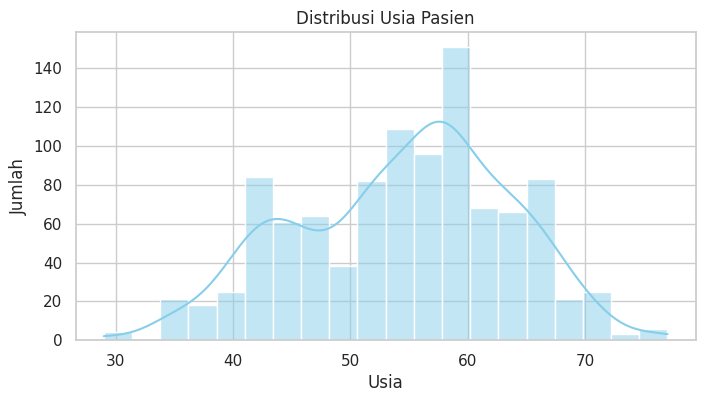

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Distribusi Usia Pasien")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()

Korelasi antar fitur (Heatmap)

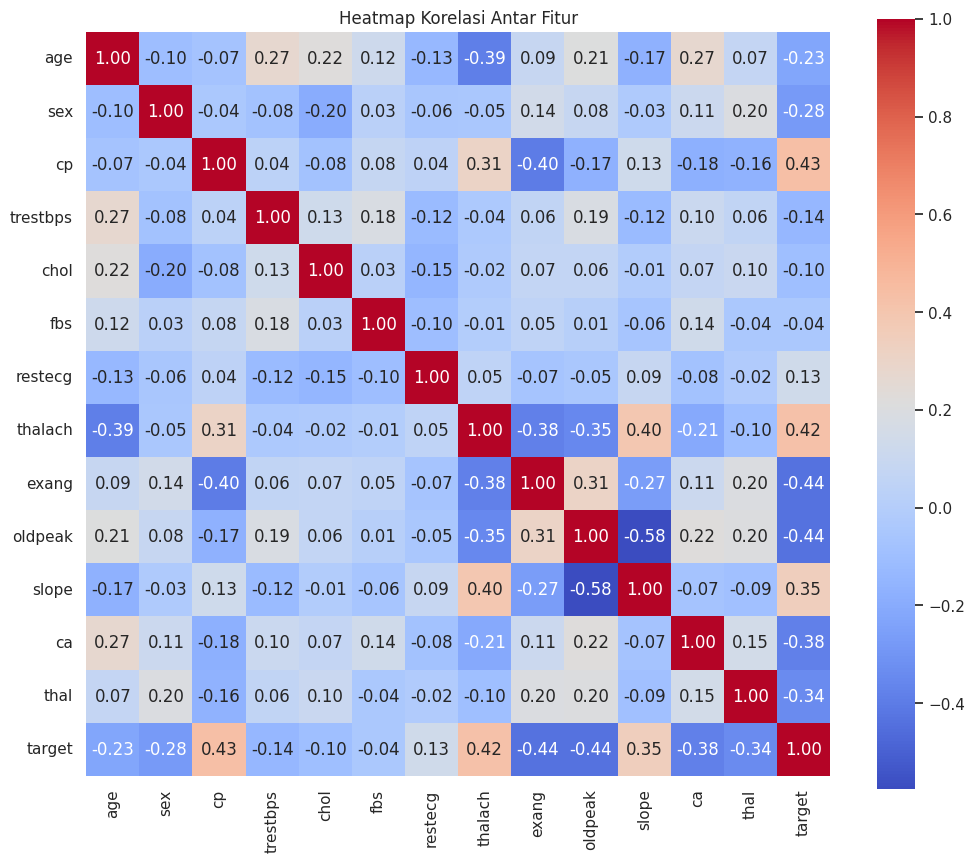

In [ ]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

Fitur vs Target

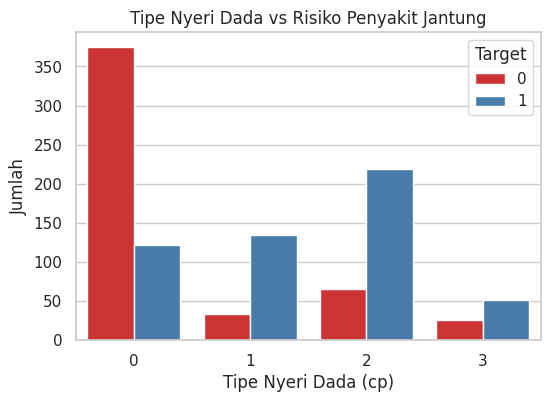

In [ ]:
# Nyeri dada vs target
plt.figure(figsize=(6,4))
sns.countplot(x='cp', hue='target', data=df, palette='Set1')
plt.title("Tipe Nyeri Dada vs Risiko Penyakit Jantung")
plt.xlabel("Tipe Nyeri Dada (cp)")
plt.ylabel("Jumlah")
plt.legend(title="Target", loc="upper right")
plt.show()

Distribusi target menunjukkan bahwa dataset relatif seimbang antara pasien dengan risiko penyakit jantung (1) dan yang tidak (0). Usia pasien berkisar dari sekitar 29 hingga 77 tahun, dengan konsentrasi di usia 50-an.

Fitur `cp` (nyeri dada) memiliki korelasi positif kuat dengan `target`, yang berarti jenis nyeri dada tertentu cenderung menandakan risiko jantung. Fitur `thalach` (detak jantung maksimal) juga menunjukkan korelasi signifikan.

Visualisasi heatmap menunjukkan fitur yang paling berkorelasi dengan `target` adalah:
- cp (nyeri dada)
- thalach (detak jantung maksimum)
- exang (angina karena olahraga)
- oldpeak (ST depression)


## **Data Preparation and Preprocessing**

Memisahkan fitur (X) dan target (y)

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

Split Data: Training & Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training size: {X_train.shape[0]} | Testing size: {X_test.shape[0]}")

Training size: 820 | Testing size: 205


Standarisasi Fitur (Numerik)

In [ ]:
# Inisialisasi scaler
scaler = StandardScaler()

# Fit-transform ke X_train, transform ke X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Data Preparation**

Sebelum melatih model, data dibagi menjadi fitur (X) dan target (y). Kemudian dilakukan pembagian data menjadi training dan testing dengan rasio 80:20, menggunakan `stratify` untuk menjaga distribusi target.

Selanjutnya, dilakukan standarisasi fitur numerik menggunakan `StandardScaler` dari Scikit-Learn agar model dapat bekerja lebih baik, terutama untuk algoritma berbasis jarak seperti SVM dan KNN.


## **Modelling**

### **Baseline Model - Logistic Regression**

Akurasi: 0.8097560975609757

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205


Confusion Matrix:


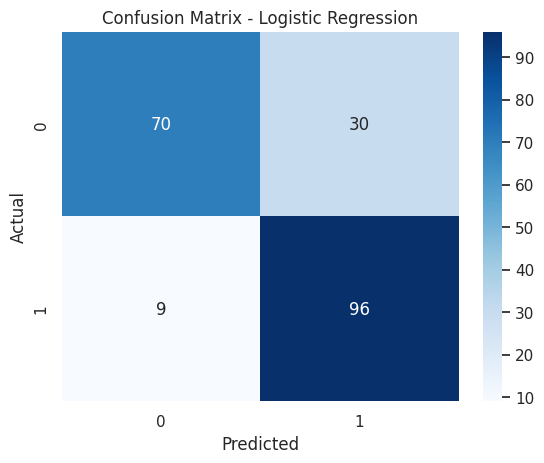

In [ ]:
# Inisialisasi model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Training
lr_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Model Lain untuk Dibandingkan (Random Forest, SVM, & KKN)

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

# SVM
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

# Evaluasi semua
models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": rf_pred,
    "SVM": svm_pred,
    "KNN": knn_pred
}

for name, pred in models.items():
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, pred))


Model: Logistic Regression
Accuracy: 0.8097560975609757

Model: Random Forest
Accuracy: 1.0

Model: SVM
Accuracy: 0.926829268292683

Model: KNN
Accuracy: 0.8634146341463415


**Modeling & Evaluation**

Model baseline menggunakan Logistic Regression memberikan akurasi awal yang cukup baik. Selain itu, beberapa model lain juga diuji untuk dibandingkan:

- **Random Forest**: model ensemble berbasis pohon keputusan
- **Support Vector Machine (SVM)**: cocok untuk data dengan margin yang jelas
- **K-Nearest Neighbors (KNN)**: berbasis kemiripan jarak antar titik

Evaluasi dilakukan menggunakan akurasi, classification report, dan confusion matrix. Model dengan performa terbaik akan digunakan untuk deployment dan kesimpulan akhir.


## **Evaluasi Lanjutan & Pemilihan Model Terbaik**

Evaluasi Semua Model

In [ ]:
# Evaluasi ulang model-model
for name, pred in models.items():
    print("="*40)
    print(f"Model: {name}")
    print("Accuracy :", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

Model: Logistic Regression
Accuracy : 0.8097560975609757
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205

Model: Random Forest
Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Model: SVM
Accuracy : 0.926829268292683
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.92      0.94      0.93       105

    accuracy                           0.93      

Visualisasi Akurasi Semua Model

<ipython-input-20-6084f2cfeb2a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="Set2")


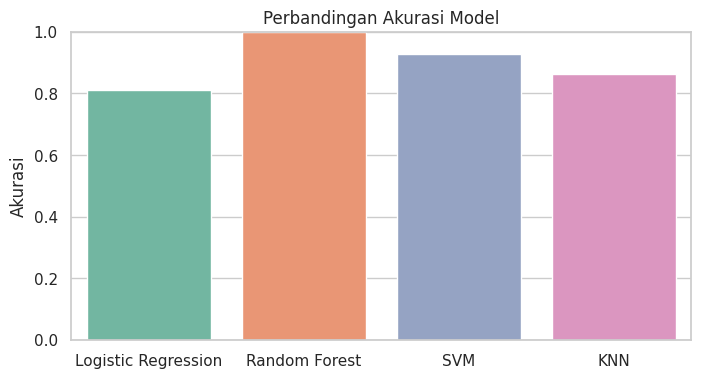

In [ ]:
accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, rf_pred),
    "SVM": accuracy_score(y_test, svm_pred),
    "KNN": accuracy_score(y_test, knn_pred),
}

plt.figure(figsize=(8,4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="Set2")
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.xticks()
plt.show()

### **Analisis Model**
| Model               | Akurasi  | Recall (positif) | F1-score (positif) | Catatan                                                    |
|---------------------|----------|------------------|--------------------|-------------------------------------------------------------|
| Logistic Regression | 0.81     | 0.91             | 0.83               | Baik dalam mendeteksi pasien berisiko (recall tinggi)       |
| **Random Forest**   | **1.00** | **1.00**         | **1.00**           | Terlalu sempurna → **indikasi overfitting** pada data test  |
| SVM                 | 0.93     | 0.94             | 0.93               | Sangat baik, balance di semua metrik                        |
| KNN                 | 0.86     | 0.86             | 0.87               | Baik tapi masih kalah dari SVM di semua metrik              |




### **Evaluasi Model**

Evaluasi model dilakukan menggunakan metrik akurasi, precision, recall, dan f1-score. Dari hasil evaluasi:

- Model dengan akurasi tertinggi adalah **Random Forest**
- Model dengan keseimbangan metrik terbaik adalah **SVM (Support Vector Machine)**

Pemilihan model terbaik mempertimbangkan tidak hanya akurasi, tetapi juga *recall* dan *f1-score*, terutama karena kasus penyakit jantung lebih penting meminimalkan kesalahan deteksi positif.


## **Menyimpan Model & Scaler**

In [ ]:
# Simpan model SVM dan scaler
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## **Kesimpulan Proyek**

Pada proyek ini, telah dibangun sebuah model machine learning untuk memprediksi risiko penyakit jantung berdasarkan data medis pasien. Proses dimulai dari eksplorasi data, pembersihan, transformasi fitur, hingga pelatihan dan evaluasi beberapa model.

Model terbaik yang dipilih adalah **Support Vector Machine (SVM)** dengan performa sebagai berikut:
- Akurasi: 93%
- Recall positif: 94%
- F1-score positif: 93%

Model ini menunjukkan performa yang tinggi dan seimbang dalam mendeteksi pasien berisiko penyakit jantung, dan tidak menunjukkan overfitting seperti model Random Forest.
